In [1]:
import matplotlib.pyplot as plt
import numpy as np



data = np.loadtxt("neutrino-xs.csv",
                 delimiter=",", dtype=float)

adata = np.loadtxt("aneutrino-xs.csv",
                 delimiter=",", dtype=float)

strengths = np.loadtxt("transition_strengths - Sheet1.csv",
           delimiter=",", dtype=float)

nu_curve_x = data.T[0]
nu_curve_y = data.T[1]

anu_curve_x = adata.T[0]
anu_curve_y = adata.T[1]

def step_xs(energy_ind, x, y, strengths = strengths.T):
    new = []
    energy_val = strengths[0][energy_ind]
    max_e = max(strengths[0])
    for i, val in enumerate(x):
        # go through list of x data
        if val > max_e:
            # check if current x energy is greater than  9.8 MeV
            # if it is, all energy stages can happen
            new.append(y[i]* ((strengths[1][energy_ind])/sum(strengths[1])))
            continue
            
        elif energy_val > val:
            # no cross section, since current energy value doesn't excite desired state
            new.append(0)
            continue
            
        else:
            # if current energy supplied is not greater than 9.8, adjustments to xs need to be made
            #if val < 4.473 or energy_val < 4.473:
            #    temp = 0
            if val >= 4.473 and val <= 5.393:
                # can only be 4.473 excited, so total cross section 
                if energy_val == 4.473:
                    temp = y[i]
                else:
                # this is probably redundant
                    temp = 0
            elif val >= 5.393 and val <= 6.085:
                temp = y[i] * (strengths[1][energy_ind] / sum(strengths[1][0:2]))
                #can be excited by either 4.473 or 5.393
            elif val >= 6.085 and val <= 7.25:
                temp = y[i] * (strengths[1][energy_ind] / sum(strengths[1][0:3]))
                # can be excited by 4.473, 5.393, and 6.085
            elif val >= 7.25 and val <= 9.8:
                temp = y[i] * (strengths[1][energy_ind] / sum(strengths[1][0:4]))
                # can be excited by 4.473, 5.393, 6.085, and 7.25
            else:
                print("Check case: ", energy_val, val, x[i], y[i])
                temp = 0
                
            new.append(temp)
            
    # missing values between these energy levels
    return new



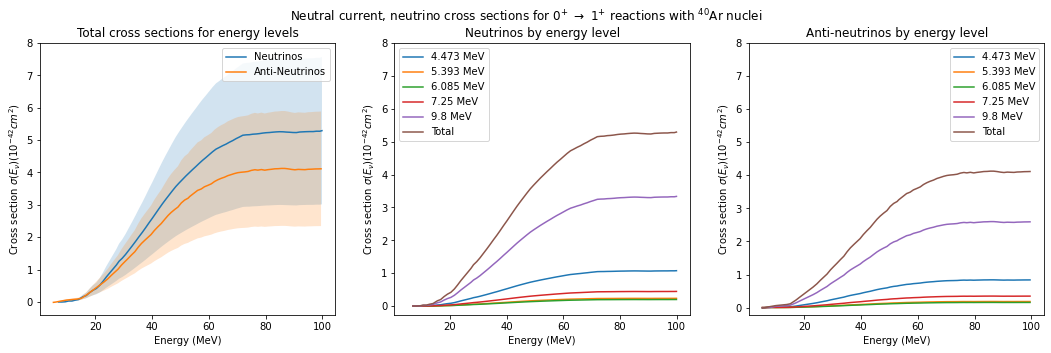

In [2]:



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(18, 5))



ax1.plot(nu_curve_x, nu_curve_y, label = "Neutrinos")
ax1.fill_between(nu_curve_x, nu_curve_y * 1.43, nu_curve_y * 0.57, alpha = 0.2)

ax1.plot(anu_curve_x, anu_curve_y, label = "Anti-Neutrinos")
ax1.fill_between(anu_curve_x, anu_curve_y * 1.43, anu_curve_y * 0.57, alpha = 0.2)




for i, val in enumerate(strengths.T[0]):
    
    # try with algorithm
    ax2.plot(nu_curve_x, (step_xs(i, nu_curve_x, nu_curve_y)), label = f"{val} MeV")
    ax3.plot(anu_curve_x, (step_xs(i, anu_curve_x, anu_curve_y)), label = f"{val} MeV")
    
ax2.plot(nu_curve_x, nu_curve_y, label = "Total")
ax3.plot(anu_curve_x, anu_curve_y, label = "Total")

ax1.set_ylim(None, 8)
ax2.set_ylim(None, 8)
ax3.set_ylim(None, 8)

ax1.set_xlabel("Energy (MeV)")
ax2.set_xlabel("Energy (MeV)")
ax3.set_xlabel("Energy (MeV)")

math_string = r"Cross section $\sigma (E_{\nu}) (10^{-42} cm^{2})$"
ax1.set_ylabel(math_string)
ax2.set_ylabel(math_string)
ax3.set_ylabel(math_string)

ax1.set_title("Total cross sections for energy levels")
ax2.set_title("Neutrinos by energy level")
ax3.set_title("Anti-neutrinos by energy level")

ax1.legend()
ax2.legend()
ax3.legend()


plt.suptitle(r"Neutral current, neutrino cross sections for $0^{+}$ $\rightarrow$ $1^{+}$ reactions with $^{40}$Ar nuclei")
plt.legend()
plt.savefig("xs_ar40_levels.png")
plt.show()
